<a href="https://www.kaggle.com/code/mouashmawy/covid-survey-analysis?scriptVersionId=178449068" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import squarify

In [2]:
# cases data
!conda install -y gdown
!gdown --id 1-GGNdN14UGPxbKg2WgnI-Yf4DwOa8xiU

Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.5.0               |  py310hff52083_0         939 KB  conda-forge
    filelock-3.14.0            |     pyhd8ed1ab_0          16 KB  conda-forge
    frozendict-2.4.4           |  py310hc51659f_0          48 KB  conda-forge
    gdown-5.2.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.3.0              |       hd590300_0         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.8 MB



In [3]:
# puf data
!gdown --id 1-AFp5KwtYkmNOdsHqpYassywvfdc51NT

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-AFp5KwtYkmNOdsHqpYassywvfdc51NT
From (redirected): https://drive.google.com/uc?id=1-AFp5KwtYkmNOdsHqpYassywvfdc51NT&confirm=t&uuid=8fbd7e88-ca7b-47cd-b670-fd836a3230f5
To: /kaggle/working/pulse_puf_most_recent.csv
100%|██████████████████████████████████████| 1.64G/1.64G [00:19<00:00, 82.7MB/s]


In [4]:
cases_data = pd.read_csv('/kaggle/working/data.csv')
cases_data.head()

/tmp/ipykernel_18/321048915.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  cases_data = pd.read_csv('/kaggle/working/data.csv')


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,MN,27.0,HENNEPIN,27053.0,18 to 49 years,Female,Unknown,Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1,2022-02,MI,26.0,OAKLAND,26125.0,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,NaN
2,2022-01,CA,6.0,LOS ANGELES,6037.0,18 to 49 years,Male,Unknown,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Missing,NaN
3,2022-01,NV,32.0,CLARK,32003.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Routine surveillance,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-05,MA,25.0,MIDDLESEX,25017.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


In [5]:
cases_data.describe()

,state_fips_code,county_fips_code,case_positive_specimen_interval,case_onset_interval
count,1.902062e+07,1.766292e+07,8.005428e+06,6.937065e+06
mean,2.772753e+01,2.738034e+04,1.746458e-01,-7.497234e-02
std,1.618596e+01,1.603458e+04,2.333100e+00,2.854385e+00
min,1.000000e+00,1.001000e+03,-2.000000e+02,-2.020000e+02
25%,1.200000e+01,1.208600e+04,0.000000e+00,0.000000e+00
50%,2.800000e+01,2.710900e+04,0.000000e+00,0.000000e+00
75%,4.200000e+01,4.100500e+04,0.000000e+00,0.000000e+00
max,7.800000e+01,5.604100e+04,2.060000e+02,1.560000e+02


In [6]:
cases_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       object 
 1   res_state                        object 
 2   state_fips_code                  float64
 3   res_county                       object 
 4   county_fips_code                 float64
 5   age_group                        object 
 6   sex                              object 
 7   race                             object 
 8   ethnicity                        object 
 9   case_positive_specimen_interval  float64
 10  case_onset_interval              float64
 11  process                          object 
 12  exposure_yn                      object 
 13  current_status                   object 
 14  symptom_status                   object 
 15  hosp_yn                          object 
 16  icu_yn                           object 
 17  death_

In [7]:
puf_data = pd.read_csv('/kaggle/working/pulse_puf_most_recent.csv')
cases_data.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,MN,27.0,HENNEPIN,27053.0,18 to 49 years,Female,Unknown,Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1,2022-02,MI,26.0,OAKLAND,26125.0,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,NaN
2,2022-01,CA,6.0,LOS ANGELES,6037.0,18 to 49 years,Male,Unknown,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Missing,NaN
3,2022-01,NV,32.0,CLARK,32003.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Routine surveillance,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-05,MA,25.0,MIDDLESEX,25017.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


In [8]:
puf_data.describe()

,week_x,est_st,est_msa,pweight,tbirth_year,abirth_year,egender,agender,rhispanic,ahispanic,...,eipspnd4,eipspnd5,eipspnd6,eipspnd7,eipspnd8,eipspnd9,eipspnd10,eipspnd11,eipspnd12,eipspnd13
count,1.088314e+06,1.088314e+06,333414.000000,1.088314e+06,1.088314e+06,1.088314e+06,1.088314e+06,1.088314e+06,1.088314e+06,1.088314e+06,...,549361.000000,549361.000000,549361.000000,549361.000000,549361.000000,549361.000000,549361.000000,549361.000000,549361.000000,549361.000000
mean,6.625740e+00,2.774647e+01,31288.329884,2.747416e+03,1.968451e+03,1.991850e+00,1.595268e+00,1.993928e+00,1.087038e+00,1.974535e+00,...,-91.415714,-94.495292,-79.417592,-77.701053,-59.384864,-79.802403,-77.061400,-91.174889,-83.612830,-91.084420
std,3.330705e+00,1.619231e+01,11395.479719,7.473224e+03,1.574601e+01,8.990997e-02,4.908402e-01,7.768472e-02,2.818913e-01,1.575329e-01,...,22.882097,15.901607,37.382547,38.716076,47.062096,37.066112,39.182175,23.322992,33.535597,23.485843
min,1.000000e+00,1.000000e+00,12060.000000,1.956301e+00,1.932000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,4.000000e+00,1.300000e+01,19100.000000,3.122841e+02,1.956000e+03,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
50%,7.000000e+00,2.700000e+01,35620.000000,8.218592e+02,1.968000e+03,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,...,-99.000000,-99.000000,-99.000000,-99.000000,-88.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
75%,9.000000e+00,4.200000e+01,40140.000000,2.338148e+03,1.981000e+03,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,...,-99.000000,-99.000000,-88.000000,-88.000000,1.000000,-88.000000,-88.000000,-99.000000,-88.000000,-99.000000
max,1.200000e+01,5.600000e+01,47900.000000,4.477657e+05,2.002000e+03,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
puf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Columns: 215 entries, scram to eipspnd13
dtypes: float64(130), int64(78), object(7)
memory usage: 1.7+ GB


In [10]:
for i in puf_data.columns:
    print(i)

scram
week_x
est_st
est_msa
pweight
tbirth_year
abirth_year
egender
agender
rhispanic
ahispanic
rrace
arace
eeduc
aeduc
ms
thhld_numper
ahhld_numper
thhld_numkid
ahhld_numkid
thhld_numadlt
wrkloss
expctloss
anywork
kindwork
rsnnowrk
unemppay
prifoodsuf
curfoodsuf
foodsufrsn1
foodsufrsn2
foodsufrsn3
foodsufrsn4
foodsufrsn5
freefood
wherefree1
wherefree2
wherefree3
wherefree4
wherefree5
wherefree6
wherefree7
tspndfood
tspndprpd
foodconf
hlthstatus
anxious
worry
interest
down
hlthins1
hlthins2
hlthins3
hlthins4
hlthins5
hlthins6
hlthins7
hlthins8
delay
notget
tenure
mortlmth
mortconf
enroll1
enroll2
enroll3
teach1
teach2
teach3
teach4
teach5
compavail
comp1
comp2
comp3
intrntavail
intrnt1
intrnt2
intrnt3
tschlhrs
ttch_hrs
income
eip
spndsrc1
spndsrc2
spndsrc3
spndsrc4
spndsrc5
spndsrc6
spndsrc7
hisp_rrace
uninsured
insured_public
inc_loss
expect_inc_loss
payment_not_conf
rent_not_conf
mortgage_not_conf
rent_not_paid
mortgage_not_paid
food_insufficient
classes_cancelled
stimulus_expenses
s

## PART 1: Exploratory Analysis

#### 1. The total number of hospitalizations versus deaths from COVID-19 over the entire US per month-year timestamp.

In [11]:
hosp_deaths_monthly = pd.merge(
        cases_data[cases_data['hosp_yn'] == 'Yes'].groupby(by="case_month")['hosp_yn'].count(),
        cases_data[cases_data['death_yn'] == 'Yes'].groupby(by="case_month")['death_yn'].count(),
        how='outer',
        on='case_month')
hosp_deaths_monthly.head()

,hosp_yn,death_yn
case_month,,
2020-01,69,62.0
2020-02,285,25.0
2020-03,16586,3435.0
2020-04,25507,9577.0
2020-05,11954,2687.0


<Axes: xlabel='case_month'>

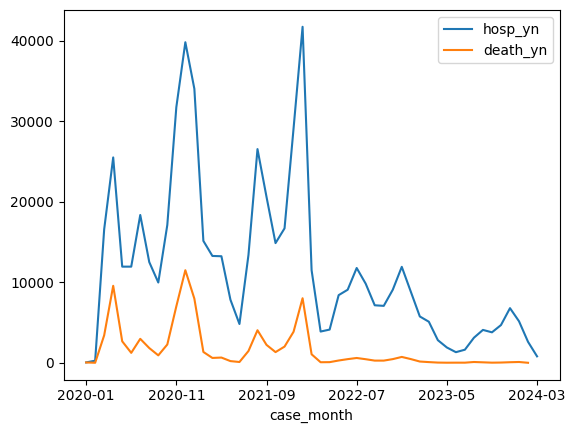

In [12]:
hosp_deaths_monthly.plot.line()

#### 2. The average rates of COVID-related deaths relative to patient demographics

In [13]:
total_deaths = cases_data[cases_data['death_yn'] == 'Yes']

In [14]:
print((total_deaths.groupby(by="sex")['death_yn'].count()/total_deaths['sex'].count()).map('{:.2%}'.format))
print('---------')
print((total_deaths.groupby(by="race")['death_yn'].count()/total_deaths['race'].count()).map('{:.2%}'.format))
print('---------')
print((total_deaths.groupby(by="ethnicity")['death_yn'].count()/total_deaths['ethnicity'].count()).map('{:.2%}'.format))


sex
Female     44.42%
Male       55.47%
Missing     0.10%
Unknown     0.01%
Name: death_yn, dtype: object
---------
race
American Indian/Alaska Native     0.15%
Asian                             2.99%
Black                            10.77%
Missing                           2.51%
Multiple/Other                    0.13%
Unknown                           3.07%
White                            80.39%
Name: death_yn, dtype: object
---------
ethnicity
Hispanic/Latino        13.83%
Missing                 1.83%
Non-Hispanic/Latino    78.14%
Unknown                 6.20%
Name: death_yn, dtype: object


#### 3.

In [15]:
(cases_data.groupby(by="age_group").count().loc[:,['death_yn', 'hosp_yn']] /cases_data.loc[:,['death_yn', 'hosp_yn']].count()).map('{:.2%}'.format)

,death_yn,hosp_yn
age_group,,
0 - 17 years,16.55%,16.55%
18 to 49 years,49.94%,49.19%
50 to 64 years,18.05%,18.19%
65+ years,13.45%,13.99%
Missing,1.06%,1.03%


#### 4.

In [16]:
(cases_data.groupby(by="res_state").count().loc[:,['death_yn', 'hosp_yn']] /cases_data.loc[:,['death_yn', 'hosp_yn']].count())

,death_yn,hosp_yn
res_state,,
AK,0.002939,0.002943
AL,0.016925,0.017207
AR,0.010200,0.010118
AZ,0.024739,0.024754
CA,0.124887,0.121246
CO,0.017635,0.017762
CT,0.006943,0.006872
DC,0.001771,0.001738
DE,0.003369,0.003262


#### 5.The relationship between age, pre-existing medical conditions and/or risk behaviors, and rate of admittance to the ICU.


In [17]:
(cases_data[cases_data['icu_yn'] == 'Yes'].groupby(by="underlying_conditions_yn").count().loc[:,['icu_yn']]\
/ cases_data['underlying_conditions_yn'].count())\
.map('{:.2%}'.format)

,icu_yn
underlying_conditions_yn,
No,0.01%
Yes,2.32%


In [18]:
(cases_data[cases_data['icu_yn'] == 'Yes'].groupby(by="age_group").count().loc[:,['icu_yn']]\
/ cases_data['age_group'].count())\
.map('{:.2%}'.format)

,icu_yn
age_group,
0 - 17 years,0.00%
18 to 49 years,0.04%
50 to 64 years,0.06%
65+ years,0.11%
Missing,0.00%


#### 6. The rate of expected employment loss due to COVID-19 and sector of employment.


In [19]:
(puf_data[puf_data['expctloss']==1].groupby(by="kindwork").count().loc[:,'expctloss']\
/ puf_data.groupby(by="kindwork").count().loc[:,'expctloss'] )\
.map('{:.2%}'.format)

kindwork
-99    26.21%
-88    31.46%
 1     19.70%
 2     24.23%
 3     22.00%
 4     39.85%
 5     29.57%
Name: expctloss, dtype: object

#### 7. The rate of expected employment loss due to COVID-19 relative to responders demographics.

In [20]:
def state_num_to_abb(num):
    state_abbreviations = {
    1: 'AL',  # Alabama
    2: 'AK',  # Alaska
    4: 'AZ',  # Arizona
    5: 'AR',  # Arkansas
    6: 'CA',  # California
    8: 'CO',  # Colorado
    9: 'CT',  # Connecticut
    10: 'DE',  # Delaware
    11: 'DC',  # District of Columbia
    12: 'FL',  # Florida
    13: 'GA',  # Georgia
    15: 'HI',  # Hawaii
    16: 'ID',  # Idaho
    17: 'IL',  # Illinois
    18: 'IN',  # Indiana
    19: 'IA',  # Iowa
    20: 'KS',  # Kansas
    21: 'KY',  # Kentucky
    22: 'LA',  # Louisiana
    23: 'ME',  # Maine
    24: 'MD',  # Maryland
    25: 'MA',  # Massachusetts
    26: 'MI',  # Michigan
    27: 'MN',  # Minnesota
    28: 'MS',  # Mississippi
    29: 'MO',  # Missouri
    30: 'MT',  # Montana
    31: 'NE',  # Nebraska
    32: 'NV',  # Nevada
    33: 'NH',  # New Hampshire
    34: 'NJ',  # New Jersey
    35: 'NM',  # New Mexico
    36: 'NY',  # New York
    37: 'NC',  # North Carolina
    38: 'ND',  # North Dakota
    39: 'OH',  # Ohio
    40: 'OK',  # Oklahoma
    41: 'OR',  # Oregon
    42: 'PA',  # Pennsylvania
    44: 'RI',  # Rhode Island
    45: 'SC',  # South Carolina
    46: 'SD',  # South Dakota
    47: 'TN',  # Tennessee
    48: 'TX',  # Texas
    49: 'UT',  # Utah
    50: 'VT',  # Vermont
    51: 'VA',  # Virginia
    53: 'WA',  # Washington
    54: 'WV',  # West Virginia
    55: 'WI',  # Wisconsin
    56: 'WY',  # Wyoming
}

    return state_abbreviations[num]
    

In [21]:
puf_data['est_st'].unique()

array([47,  1, 26,  2, 25, 12, 33, 53,  4,  5, 13,  6, 48,  8,  9, 36, 10,
       15, 37, 16, 40, 17, 18, 45, 19, 20, 27, 55, 22, 21, 23, 24, 28, 29,
       32, 49, 30, 41, 31, 34, 35, 38, 46, 39, 42, 44, 51, 11, 54, 50, 56])

In [22]:
puf_data['res_state'] = puf_data['est_st'].apply(state_num_to_abb)

#### 8. The rate of expected employment loss due to COVID-19 for the top 10 states with the highest rate of COVID hospitalization.

In [23]:
states_expctloss = \
(puf_data[puf_data['expctloss']==1].groupby(by="res_state").count().loc[:,'expctloss']\
/ puf_data.groupby(by="res_state").count().loc[:,'expctloss'] )\
.map('{:.2%}'.format)

In [24]:
states_hosp = \
(cases_data.groupby(by="res_state").count().loc[:,['hosp_yn']] /cases_data.loc[:,['hosp_yn']].count())\
.map('{:.2%}'.format)

In [25]:
pd.merge(states_hosp , states_expctloss, how="outer", on="res_state").sort_values(by=["hosp_yn"], ascending = [False]).iloc[:10,:1]

,hosp_yn
res_state,
TX,9.01%
NY,7.23%
FL,5.83%
IL,4.18%
PA,3.58%
OH,3.53%
NC,3.36%
NJ,3.18%
MI,2.98%


#### 9. The relationship between household income and the rate of delayed/ OR unobtained medical treatment (Due to COVID or otherwise).

In [26]:
(puf_data[puf_data['delay'] == 1].groupby(by="income").count().loc[:,['delay']]\
/ puf_data['income'].count())\
.map('{:.2%}'.format)

,delay
income,
-99,0.75%
-88,0.62%
1,4.37%
2,3.41%
3,4.21%
4,6.80%
5,5.57%
6,6.80%
7,3.19%


#### 10. The relationship between COVID-19 symptom manifestation and age group.

In [27]:
(cases_data[cases_data['symptom_status'] == 'Symptomatic'].groupby(by="age_group").count().loc[:,['symptom_status']]
/ cases_data['age_group'].count())\
.map('{:.2%}'.format)

,symptom_status
age_group,
0 - 17 years,5.85%
18 to 49 years,17.19%
50 to 64 years,6.46%
65+ years,4.90%
Missing,0.20%
